In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
colunas = ['Area', 'Perimeter', 'Compactness', 'Kernel_Length',
           'Kernel_Width', 'Asymmetry_Coeff', 'Kernel_Groove', 'Class']
df = pd.read_csv("/content/seeds_dataset.txt", sep='\s+', names =colunas)
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1839955811.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("/content/seeds_dataset.txt", sep='\s+', names =colunas)


,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
df.describe()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


<Axes: >

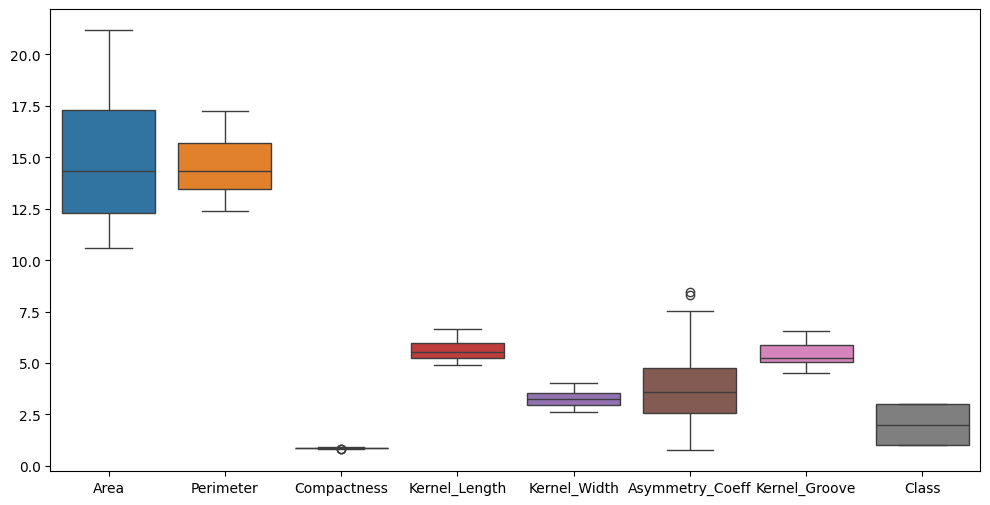

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)

<Axes: ylabel='Count'>

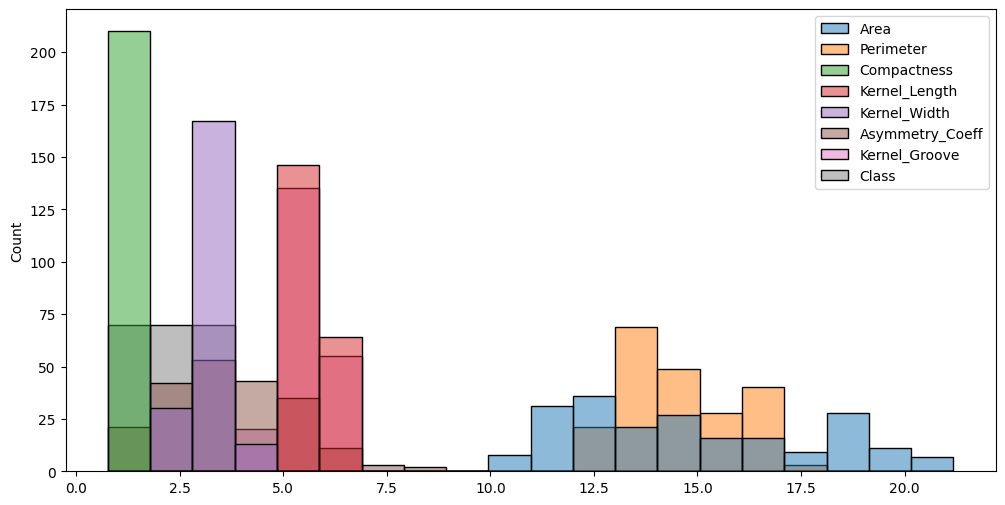

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(data=df)

In [8]:
df.isnull().sum()

,0
Area,0
Perimeter,0
Compactness,0
Kernel_Length,0
Kernel_Width,0
Asymmetry_Coeff,0
Kernel_Groove,0
Class,0


In [9]:
X = df.drop('Class', axis=1)
y = df['Class']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
KNN = KNeighborsClassifier(n_neighbors=3)

X_knn = KNN.fit(X_train, y_train)
y_pred= KNN.predict(X_test)
KNN_accuracy = accuracy_score(y_test, y_pred)

print(f"A Acurácia é de:{KNN_accuracy:0.2f}")

A Acurácia é de:0.90


In [29]:
from sklearn.model_selection import GridSearchCV
parametros = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20]
}

In [30]:
from sklearn.ensemble import RandomForestClassifier
grid = GridSearchCV(RandomForestClassifier(), parametros, cv=5)
grid.fit(X_train, y_train)
y_forest= grid.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_forest)

print(f"A Acurácia é de:{forest_accuracy:0.2f}")

A Acurácia é de:0.90


In [14]:
from sklearn.naive_bayes import GaussianNB
bayes= GaussianNB()

X_bayes = bayes.fit(X_train, y_train)
y_bayes= bayes.predict(X_test)
bayes_accuracy = accuracy_score(y_test, y_bayes)

print(f"A Acurácia é de:{bayes_accuracy:0.2f}")

A Acurácia é de:0.87
